<h1> EDA & Data Visualization </h1>
<hr>
<h3>In this section we will visualize the data and make useful reports and dashboards in order to get more familiar and have a more clear vision of this data.</h3>
<br><br>
For this part, we import our data and change the index to datetime so we can work on the time series data. We will start by showing what are the top products that we sold across the globe. There two indicators that can show us how much benefit came from each product. In the first plot of the subplot below, we can see the top 20 products that were bought in the most amounts by the customers and  in the second plot we can see which products have brought us the most monetary benefit.

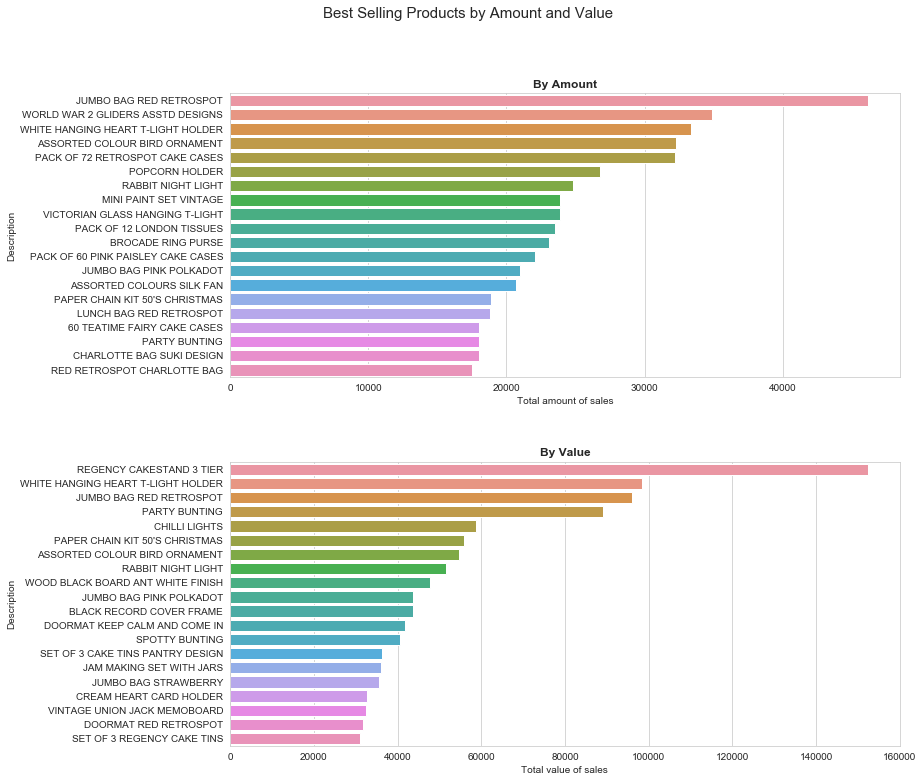

In [1]:
#importing necessary libraries and the cleaned dataset
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
CleanDataset = r'../Cleaned-Dataset/OnlineRetail_Cleaned.csv'
Data_Cleaned = pd.read_csv(CleanDataset, index_col = 'InvoiceDate')
Data_Cleaned.index = pd.to_datetime(Data_Cleaned.index, format = '%Y-%m-%d %H:%M', box = False)
#top 20 products by quantity and finalprice
sns.set_style('whitegrid')
Top20Quan = Data_Cleaned.groupby('Description')['Quantity'].agg('sum').sort_values(ascending=False)[0:20]
Top20Price = Data_Cleaned.groupby('Description')['FinalPrice'].agg('sum').sort_values(ascending=False)[0:20]
#creating the subplot
fig,axs = plt.subplots(nrows=2, ncols=1, figsize = (12,12))
plt.subplots_adjust(hspace = 0.3)
fig.suptitle('Best Selling Products by Amount and Value', fontsize=15, x = 0.4, y = 0.98)
sns.barplot(x=Top20Quan.values, y=Top20Quan.index, ax= axs[0]).set(xlabel='Total amount of sales')
axs[0].set_title('By Amount', size=12, fontweight = 'bold')
sns.barplot(x=Top20Price.values, y=Top20Price.index, ax= axs[1]).set(xlabel='Total value of sales')
axs[1].set_title('By Value', size=12, fontweight = 'bold')
plt.show()

The next statistic that we are interested in is that which products werer mostly returned by our customers and also which customers and from which countries had the most returned items in their transactions.

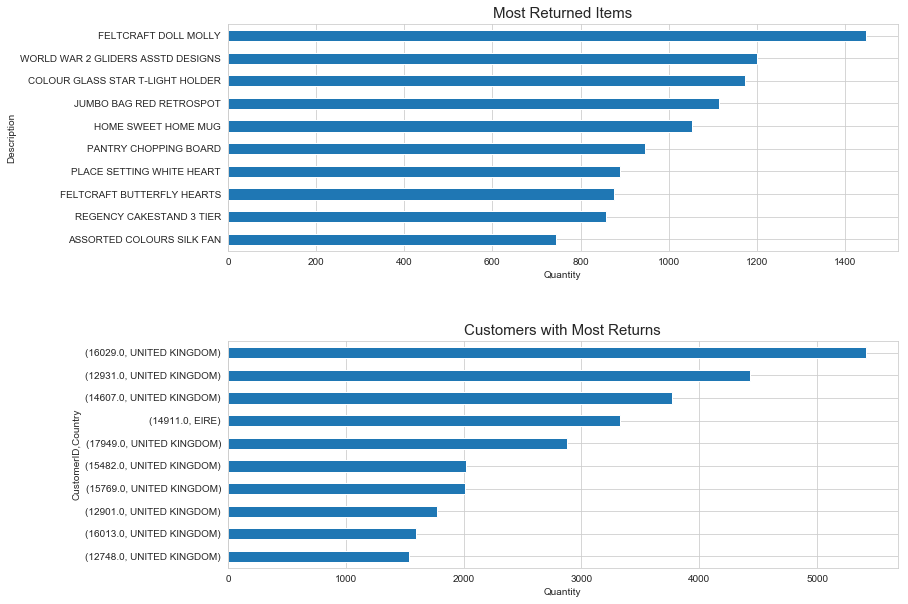

In [2]:
#finding the most returned items and the customers with the corresponding country
ReturnedItems = Data_Cleaned[Data_Cleaned.Quantity<0].groupby('Description')['Quantity'].sum()
ReturnedItems = ReturnedItems.abs().sort_values(ascending=False)[0:10]
ReturnCust = Data_Cleaned[Data_Cleaned.Quantity<0].groupby(['CustomerID','Country'])['Quantity'].sum()
ReturnCust = ReturnCust.abs().sort_values(ascending=False)[0:10]
#creting the subplot
fig, [ax1, ax2] = plt.subplots(nrows=2, ncols=1, figsize=(12,10))
ReturnedItems.sort_values().plot(kind='barh', ax=ax1).set_title('Most Returned Items', fontsize=15)
ReturnCust.sort_values().plot(kind='barh', ax=ax2).set_title('Customers with Most Returns', fontsize=15)
ax1.set(xlabel='Quantity')
ax2.set(xlabel='Quantity')
plt.subplots_adjust(hspace=0.4)
plt.show()

In the jointplot below, we can see the pairwise comparison between the 'UnitPrice' and the 'Quantity' of the purchased products. It makes sense that as the price of a product increases, the amount of sales of that product would get smaller and customers are more inclined to buy products in larger quantities if they have lower prices.

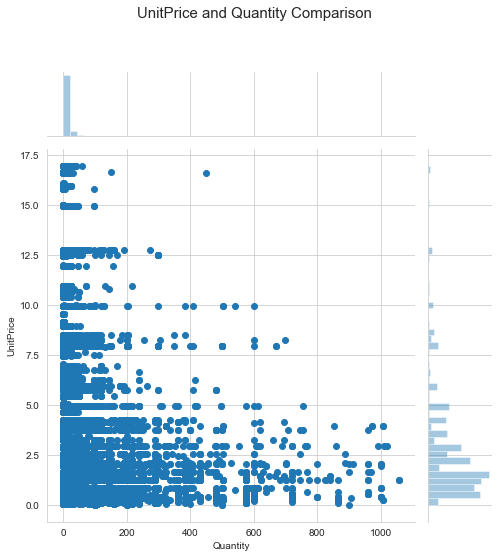

In [3]:
#plotting the qunatity vs unitprice
Corr = sns.jointplot(x="Quantity", y="UnitPrice", data = Data_Cleaned[Data_Cleaned.FinalPrice>0], height = 7)
Corr.fig.suptitle("UnitPrice and Quantity Comparison", fontsize = 15, y = 1.1)
plt.show()

In the next chart we are going to see the trend of the sales during the year in a weekly manner. We can get the weekly sales by resampling our time series data to weeks and get the sum of the values in each week. In the first charts we can see the weekly sales and in the second one the weekly returns by customers. After a sudden decline in January, we can see an almost upward trend in the sales. As for the returns, except for the second week of October, it is almost invariant but with a slight increase.

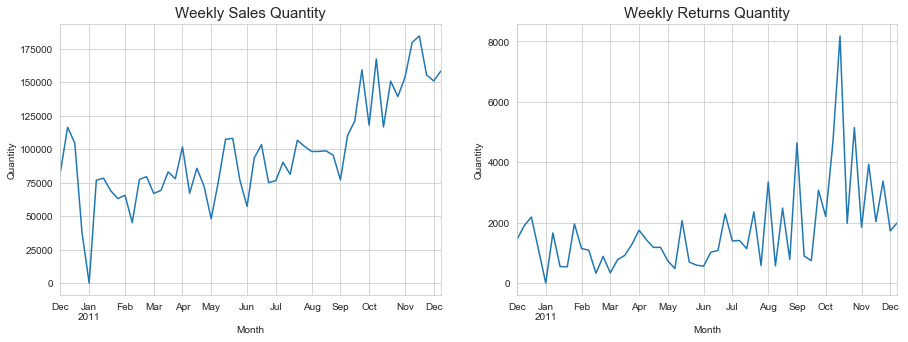

In [7]:
#resampling to get the weekly sales and returns
WeeklySale = Data_Cleaned[Data_Cleaned['Quantity']>0].Quantity.resample('W').sum()
WeeklyRet = Data_Cleaned[Data_Cleaned['Quantity']<0].Quantity.resample('W').sum().abs()
#creating the subplot
fig,[ax1, ax2] = plt.subplots(nrows=1,ncols=2, figsize = (15,5))
WeeklySale.plot(ax=ax1).set(xlabel="Month", ylabel="Quantity")
ax1.set_title("Weekly Sales Quantity", fontsize = 15)
WeeklyRet.plot(ax=ax2).set(xlabel="Month", ylabel="Quantity")
ax2.set_title("Weekly Returns Quantity", fontsize = 15)
plt.show()

In the next chart, we are going to see how many items were sold and returned across the foreign countries. Since United Kingdom has the majority of sales and it will not give us any useful information, we will not show it in our chart so it would have a better and more informing look. It looks like our product were mostly sold in Netherlands and mostly returned in Ireland(EIRE).

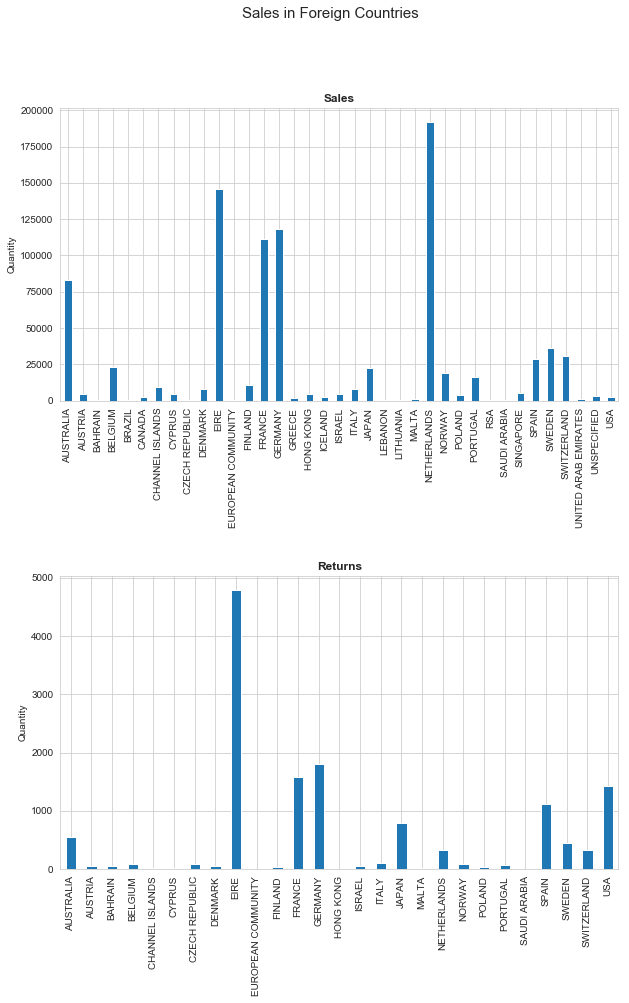

In [9]:
#grouping data by the countries(except UK)
ByCountrySale = Data_Cleaned[(Data_Cleaned.Country != 'UNITED KINGDOM') & (Data_Cleaned.Quantity > 0)].groupby('Country')['Quantity'].sum()
ByCountryRet = Data_Cleaned[(Data_Cleaned.Country != 'UNITED KINGDOM') & (Data_Cleaned.Quantity < 0)].groupby('Country')['Quantity'].sum().abs()
#creating the subplot
fig, [ax1,ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10,14))
ByCountrySale.plot(kind='bar', ax=ax1).set(ylabel = 'Quantity',xlabel='')
ax1.set_title('Sales', size=12, fontweight = 'bold')
ByCountryRet.plot(kind='bar', ax=ax2).set(ylabel = 'Quantity',xlabel='')
ax2.set_title('Returns', size=12, fontweight = 'bold')
plt.suptitle('Sales in Foreign Countries', fontsize = 15)
plt.subplots_adjust(hspace = 0.6)
plt.show()

Since we got the day of the week in which the items were sold, we can use it to see the sales value by each day of the week. As it is obvious Thursday has the most and Sunday has the least value.

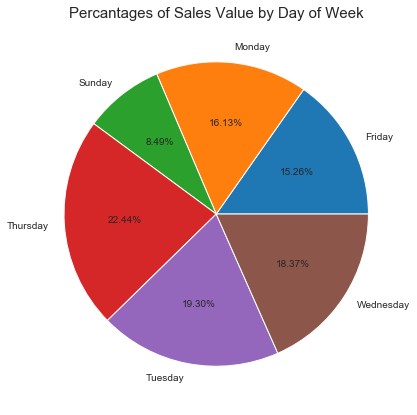

In [10]:
#creating the pie chart
Data_Cleaned.groupby('Day of week')['FinalPrice'].sum().plot(kind = 'pie', autopct = '%.2f%%', figsize=(7,7)).set(ylabel='')
plt.title('Percantages of Sales Value by Day of Week', fontsize = 15)
plt.show()

We can filter out our best customers based on the value that they brought to the company and also show from which countries they come from.

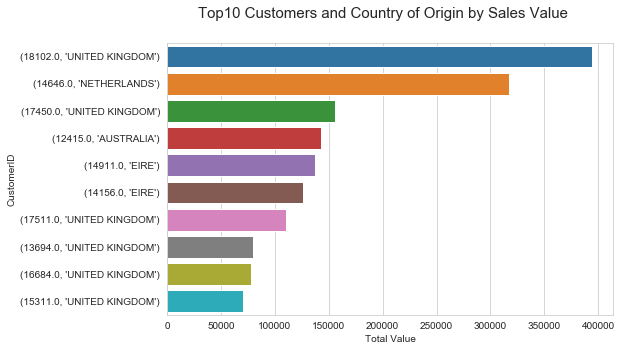

In [11]:
#filtering customers by the total finalprice
Top10Customers = Data_Cleaned.groupby(['CustomerID','Country'])['FinalPrice'].sum().sort_values(ascending=False)[0:10]
#creating the barplot
plt.figure(figsize=(8,5))
sns.barplot(x=Top10Customers.values, y=Top10Customers.index).set(xlabel='Total Value',ylabel='CustomerID')
plt.suptitle('Top10 Customers and Country of Origin by Sales Value', fontsize = 15)
plt.show()

Another statistic that we could use for the future planning, is how many of our customers are repeat customers, meaning that they bought products from us more than once. In the plot below we can see that almost 70% of the customers are repeat customers. In the other plot we can also see which customers from which countries had the most repeats.

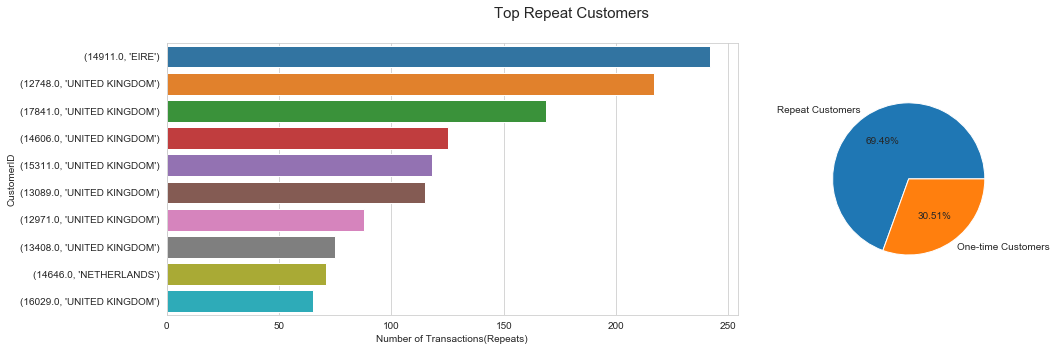

In [12]:
#grouping customers by the number of their visits and separating them
MostRepeat = Data_Cleaned.groupby(['CustomerID','Country'])['InvoiceNo'].nunique().sort_values(ascending=False)
rep = MostRepeat[MostRepeat != 1].values
nrep = MostRepeat[MostRepeat == 1].values
ser = pd.Series([len(rep)/(len(rep)+len(nrep)),len(nrep)/(len(rep)+len(nrep))], index=['Repeat Customers','One-time Customers'])
#creating the subplot
fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize= (15,5), gridspec_kw= {'width_ratios':[3,1]})
plt.subplots_adjust(wspace=0.2)
sns.barplot(x=MostRepeat[0:10].values, y=MostRepeat[0:10].index, ax=ax1).set(xlabel='Number of Transactions(Repeats)',ylabel='CustomerID')
ser.plot(kind='pie', autopct='%.2f%%', ax=ax2).set(ylabel='')
plt.suptitle('Top Repeat Customers', fontsize=15)
plt.show()

In the plots below, we can see the distribution plots of the the 'Quantity' and 'UnitPrice' attributes.

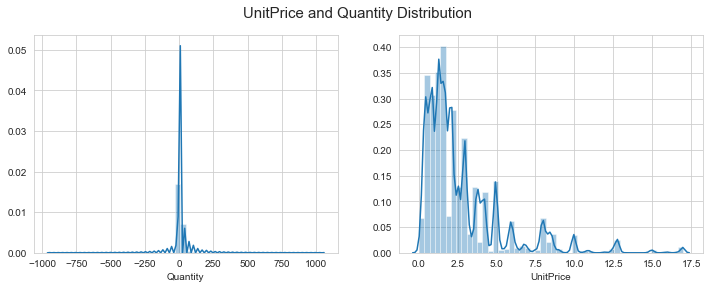

In [14]:
#creating distribution plots
fig , [ax1,ax2] = plt.subplots(nrows=1,ncols=2,figsize=(12,4))
with sns.axes_style('dark'):
    sns.distplot(Data_Cleaned['Quantity'], ax=ax1)
    sns.distplot(Data_Cleaned['UnitPrice'], ax=ax2)
fig.suptitle('UnitPrice and Quantity Distribution', fontsize = 15)
plt.show()

In the last plot, we will use three features two show how the sales are distributed among different months and days of week. To show that, we will use seaborn's heatmap. The x-axis shows the day and the y-axis shows the month in which the items were bought. The color scale shows the total value of sales.

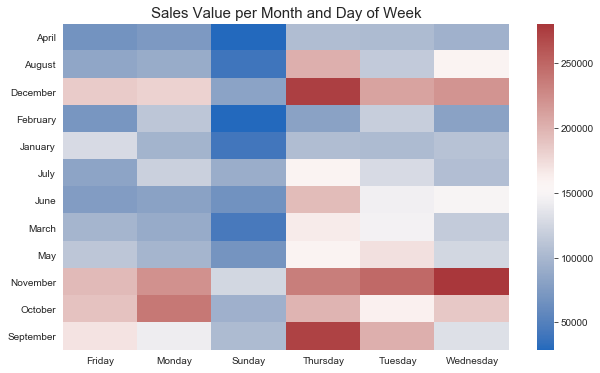

In [16]:
HM_Data = Data_Cleaned.pivot_table(index = 'InvoiceMonth',columns = 'Day of week', values = 'FinalPrice', aggfunc='sum')
plt.figure(figsize = (10,6))
sns.heatmap(HM_Data, cmap = 'vlag').set(xlabel='', ylabel='')
plt.title('Sales Value per Month and Day of Week', fontsize = 15)
plt.show()